In [1]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

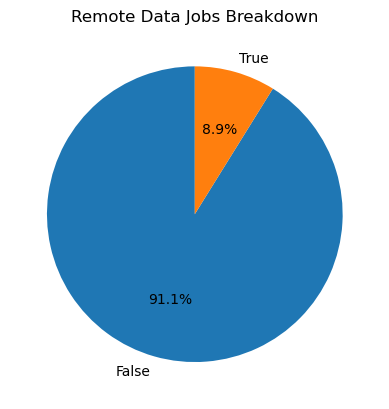

In [ ]:
### Going to use "job_work_from_home column for boolean pie chart"

# startangle reorients pie chart, autopct format indicates decimals etc., 
# f indicates a 'floating point number' (? look up), two % symbols at end shows % on chart
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%') 

plt.title('Remote Data Jobs Breakdown')
plt.ylabel('')
plt.show()

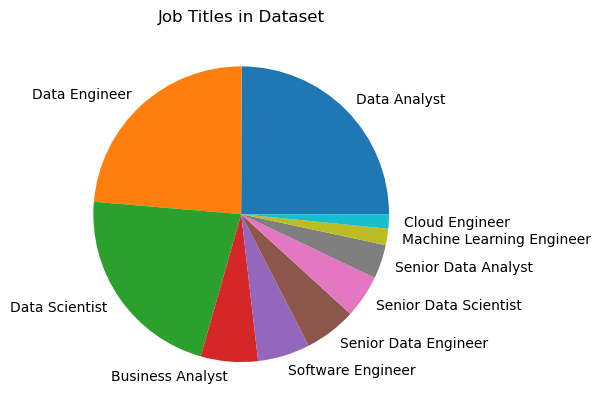

In [ ]:
### Now for a column that has more than boolean

# Kind of a shitty use for pie chart

df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Job Titles in Dataset')
plt.ylabel('')
plt.show()

### My attempt before watching the video of combining pie charts, unsurprisingly wrong

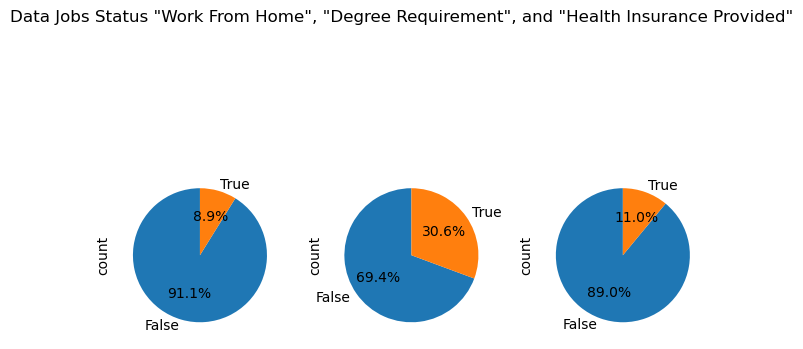

In [ ]:
### Use subplot pie charts to plot all the boolean columns as pie charts together

# Thi was my attempt before watching the video, unsurprisingly, it's wrong

fig, ax = plt.subplots(1,3)

df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=ax[0])

df['job_no_degree_mention'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=ax[1])

df['job_health_insurance'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=ax[2])

fig.suptitle('Data Jobs Status "Work From Home", "Degree Requirement", and "Health Insurance Provided"')
plt.tight_layout()

### Now the correct way

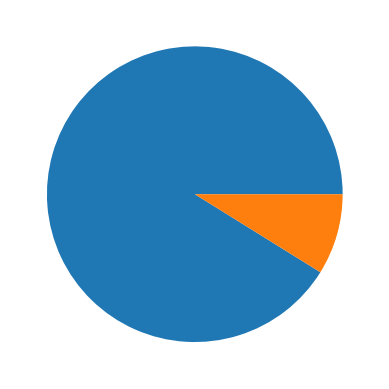

In [13]:
### Here is the correct way to do this
fig, ax = plt.subplots()

# The following is the function in matplotlib that is specifically for calling multiple pie charts

ax.pie(df['job_work_from_home'].value_counts())
# Quick check to see if plotting correctly
plt.show()


### Second iteration of above

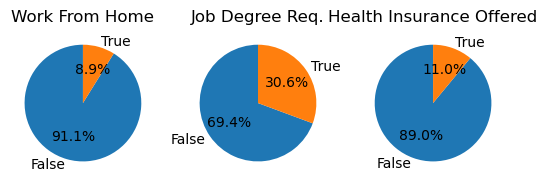

In [ ]:
### Here is the correct way to do this
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work From Home', # Creating dictionary to define the headings we will use for each chart
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

# for loop to iterate through dictionary

for i, (column, title) in enumerate(dict_column.items()): # i indicates index, (column, title) indicates tuple back from dictionary
    #print(i, column, title) # Can use to check if you comment out the chart stuff below
    
    # Must get "labels" in correct order for this code
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
    


# The following is the function in matplotlib that is specifically for calling multiple pie charts

#ax.pie(df['job_work_from_home'].value_counts())
# Quick check to see if plotting correctly
plt.show()
